# COVID-19 cases in Poços de Caldas

A repo for coronavirus related case count data from Poços de Caldas, MG, Brazil.

In [1]:
import pandas as pd
from matplotlib.dates import DateFormatter
from os import path
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import_from_web = True


# get data from the Healthy Department of the State of Minas Gerais
if import_from_web:
    try:
        df = pd.read_csv('https://www.saude.mg.gov.br/images/noticias_e_eventos/000_2020/coronavirus-dados-csv/notificacoes-covid19-mg.csv',
                         encoding = "ISO-8859-1",
                         dayfirst=True, 
                         sep=';',
                         parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                        )
    except:
        print('Error: unable to download the file.')
        df = pd.read_csv('data/notificacoes-covid19-mg.csv',
                         encoding = "ISO-8859-1",
                         dayfirst=True, 
                         sep=';',
                         parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                        )
        

else:
    df = pd.read_csv('data/notificacoes-covid19-mg.csv',
                     encoding = "ISO-8859-1",
                     dayfirst=True, 
                     sep=';',
                     parse_dates =['DATA_NOTIFICACAO', 'DATA_ATUALIZACAO']
                    )

# filtering the data related to Poços de Caldas
city = 'POÇOS DE CALDAS'
df_city = df[df['MUNICIPIO_RESIDENCIA'] == city].sort_values(by=['DATA_NOTIFICACAO']).reset_index().drop(['index'], axis=1)

## Confirmed Cases

In [2]:
# organizing the data
df_conf = df_city['DATA_NOTIFICACAO'].value_counts().rename_axis(['DATA_NOTIFICACAO']).reset_index(name='NOVOS_CASOS').sort_values('DATA_NOTIFICACAO')
df_conf = df_conf.reset_index().drop(['index'], axis=1)

# add cumulative cases column
df_conf['CONFIRMADOS'] = df_conf['NOVOS_CASOS'].cumsum()

# exporting a csv file
df_conf.to_csv(path.join('data', 'PC-COVID19-Total-Confirmed-Cases.csv'))

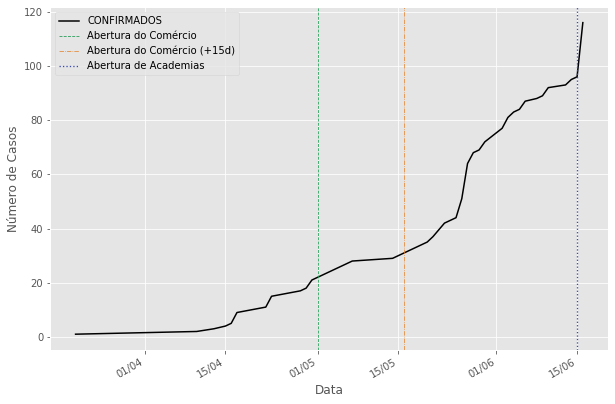

In [3]:
plt_conf = df_conf.plot.line(x='DATA_NOTIFICACAO',y='CONFIRMADOS',color="black",
                                              figsize=(10,7))

plt_conf.axvline("2020-05-01",label='Abertura do Comércio',  color="#229954", lw=0.8, linestyle="--")
plt_conf.axvline("2020-05-16",label='Abertura do Comércio (+15d)', color="#E67E22", lw=0.7, linestyle="-.")
plt_conf.axvline("2020-06-15",label='Abertura de Academias', color="#3849B1", lw=1.3, linestyle=":")

plt_conf.xaxis.set_major_formatter(DateFormatter('%d/%m'))
plt_conf.set_ylabel("Número de Casos")
plt_conf.set_xlabel("Data")
plt_conf.legend()
plt_conf.get_figure().savefig(path.join('data','graph_confirmed_cases.png'), bbox_inches='tight')